## Step 1: Import libraries and collect data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv("Titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 2: Analyzing data

In [5]:
print("No of passengers in original data:" +str(len(titanic_data.index)))

No of passengers in original data:891


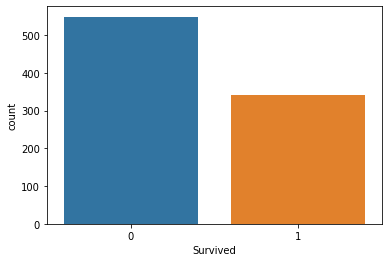

In [6]:
sns.countplot(x="Survived", data=titanic_data)

#### Key of graph:
#### 0- who didn't survived
#### 1- who survived

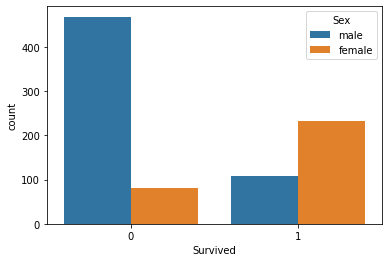

In [7]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

#### From graph it is seen that a huge amount of male didn't survived as compared to women who didn't survived

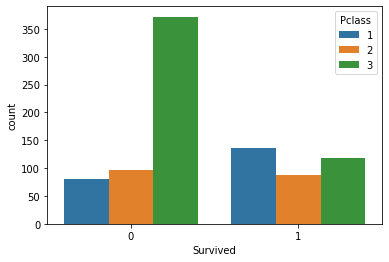

In [8]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

#### From the above graph it is seems that 3rd class people(green) mostly died and first class people(blue) survived the most.

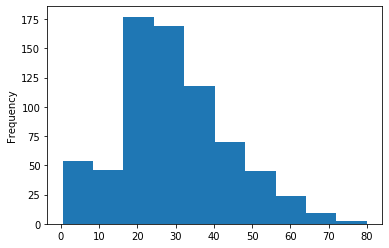

In [9]:
titanic_data["Age"].plot.hist()

#### mostly people of age between 18-40 were traveling in it.

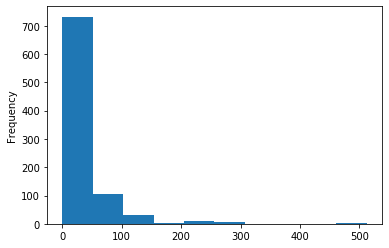

In [10]:
titanic_data["Fare"].plot.hist()

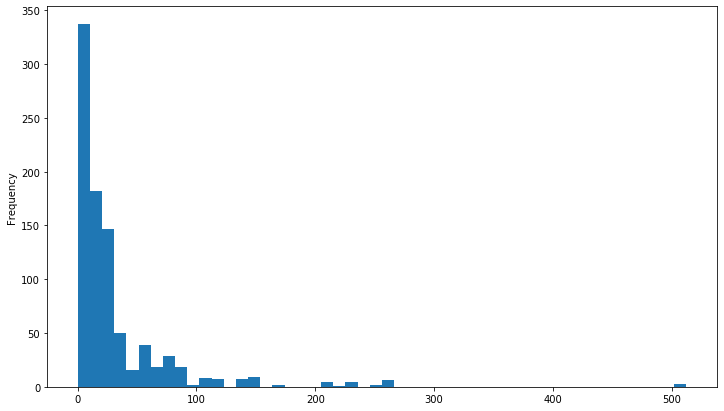

In [11]:
titanic_data["Fare"].plot.hist(bins=50, figsize=(12,7))

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### .info() us used to give the details about data(column and its details)

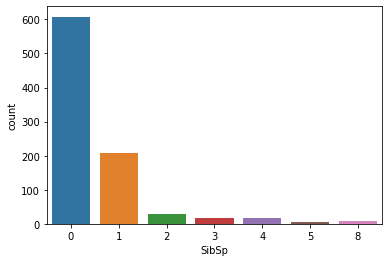

In [13]:
sns.countplot(x="SibSp", data=titanic_data)

#### highest no. of sblings and spouse were on board

## Step 3: Data Wrangling

In [14]:
#We can see how much of the data is null, 'True' below in the data set represents the null data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#Lets see the exact values of null data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

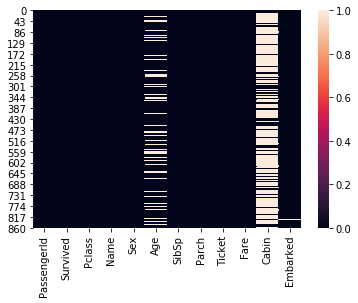

In [16]:
#Now lets visualize the empty data
sns.heatmap(titanic_data.isnull())

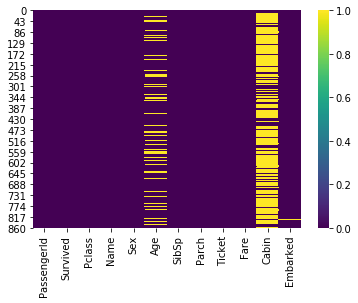

In [17]:
#cmap used for color coding
sns.heatmap(titanic_data.isnull(), cmap="viridis")

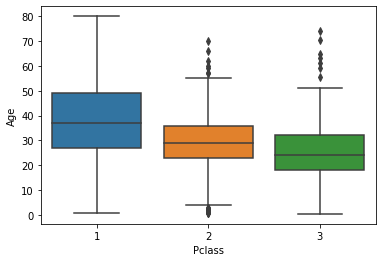

In [18]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

#### Passengers attain to travel in first class(blue) are of older ages as compare to other class.

In [19]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#now drop the cabain column because it contains NaN values
titanic_data.drop("Cabin", axis=1, inplace=True)

In [21]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Placing true in the null places in the age column
titanic_data.dropna(inplace=True)

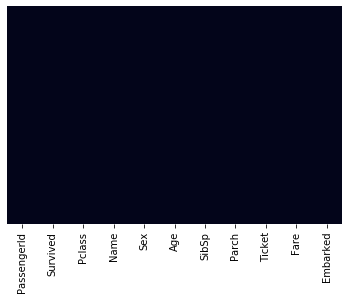

In [23]:
#Lets diplay heatmap of our data and see if its completely clean or not
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [24]:
#We can also see in figures that our data is now cleaned.
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
#Now for logic regression we doesn’t need string so we need to convert it into dummy values.
#For this we need pandas, ML model also doesn’t need string
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [26]:
#0-female, 1-male ; we can merge into one column
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### (When both values of embark table is 0, means Embarked is 'C')

In [28]:
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


#### (When both values of Passenger class table is 0, means  Passenger class is 'First Class')

In [29]:
#Concatenate all the above edited data
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [30]:
#Eliminate all the above wrangled data
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Step 4: Train & Test Data

In [31]:
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.75      0.72      0.73        88

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.78       214
weighted avg       0.78      0.79      0.78       214



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

#### True positive: 107 (We predicted a positive result and it was positive)
#### True negative: 60 (We predicted a negative result and it was negative)
#### False positive: 21 (We predicted a positive result and it was negative)
#### False negative: 26 (We predicted a negative result and it was positive)